In [1]:
import pandas as pd
import geopandas as gpd
from shapely import Point
import contextily as cx

In [35]:
map_educationLevel = {
    "COLEGIO DE EDUCACIÓN INFANTIL Y PRIMARIA" : "INFANTIL_PRIMARIA",
    "ESCUELA INFANTIL PRIVADA" : "INFANTIL",
    "CENTRO PRIVADO DE EDUCACIÓN INFANTIL, PRIMARIA Y SECUNDARIA" :  "INFANTIL_PRIMARIA_SECUNDARIA",
    "ESCUELA INFANTIL" : "INFANTIL",
    "INSTITUTO DE EDUCACIÓN SECUNDARIA" : "SECUNDARIA",
    "CENTRO PRIVADO DE FORMACIÓN PROFESIONAL ESPECÍFICA" : "FORMACIONPROFESIONAL",
    "ESCUELA  INFANTIL-CASA DE NIÑOS" : "INFANTIL",
    "CENTRO DOCENTE EXTRANJERO EN ESPAÑA" : "OTRO",
    "ESCUELA MUNICIPAL DE MÚSICA" : "MUSICA",
    "CENTRO PÚBLICO DE EDUCACIÓN DE PERSONAS ADULTAS" : "EDUCACIONADULTA",
    "CENTRO PRIVADO DE EDUCACIÓN INFANTIL" : "INFANTIL",
    "CENTRO AUTORIZADO DE ENSEÑANZAS DEPORTIVAS GRADO MEDIO Y SUPERIOR" : "SECUNDARIA_SUPERIOR",
    "CENTRO PRIVADO DE EDUCACIÓN INFANTIL Y PRIMARIA" : "INFANTIL_PRIMARIA",
    "CENTRO PRIVADO DE EDUCACIÓN ESPECIAL" : "EDUCACIONESPECIAL",
    "COLEGIO DE EDUCACIÓN INFANTIL, PRIMARIA Y SECUNDARIA" : "INFANTIL_PRIMARIA_SECUNDARIA",
    "EQUIPO DE ORIENTACIÓN EDUCATIVA Y PSICOPEDAGÓGICA. GENERAL." : "OTRONOEDUCATIVO",
    "ZONA CASAS DE NIÑOS" : "INFANTIL",
    "CENTRO PRIVADO DE EDUCACIÓN SECUNDARIA" : "SECUNDARIA",
    "ESCUELA MUNICIPAL DE MÚSICA Y DANZA" : "MUSICA_DANZA",
    "ESCUELA OFICIAL DE IDIOMAS" : "IDIOMAS",
    "COLEGIO DE EDUCACIÓN ESPECIAL" : "EDUCACIONESPECIAL",
    "CENTRO PRIVADO DE EDUCACIÓN PRIMARIA Y SECUNDARIA" : "PRIMARIA_SECUNDARIA",
    "EQUIPO DE ORIENTACIÓN EDUCATIVA Y PSICOPEDAGÓGICA. ATENCIÓN TEMPRANA" : "OTRONOEDUCATIVO",
    "CENTRO AUTORIZADO ELEMENTAL DE MÚSICA" : "MUSICA",
    "CONSERVATORIO PROFESIONAL DE MÚSICA" : "MUSICA",
    "CENTRO AUTORIZADO PROFESIONAL DE MÚSICA" : "MUSICA",
    "AULA HOSPITALARIA" : "HOSPITALARIA",
    "CENTRO PRIVADO DE EDUCACIÓN DE PERSONAS ADULTAS" : "EDUCACIONADULTA",
    "UNIDAD DE FORMACIÓN E INSERCIÓN LABORAL" : "FORMACIONPROFESIONAL",
    "CENTRO AUTORIZADO DE ENSEÑANZAS DEPORTIVAS GRADO MEDIO" : "SECUNDARIA",
    "CENTRO EDUCATIVO-TERAPÉUTICO" : "OTRO",
    "CENTRO AUTORIZADO SUPERIOR DE MÚSICA" : "MUSICA",
    "CENTRO PÚBLICO DE EDUCACIÓN ADULTOS ESTABLECIMIENTOS PENITENCIARIOS" : "EDUCACIONADULTA_PENITENCIARIO",
    "ESCUELA MUNICIPAL DE EDUCACIÓN DE PERSONAS ADULTAS" : "EDUCACIONADULTA",
    "ESTABLECIMIENTO ADMINISTRATIVO" : "OTRONOEDUCATIVO",
    "EXTENSION ESCUELA OFICIAL DE IDIOMAS" : "IDIOMAS",
    "EQUIPO DE ORIENTACIÓN EDUCATIVA Y PSICOPEDAGÓGICA. ESPECÍFICO" : "OTRONOEDUCATIVO",
    "CENTRO PÚBLICO INTEGRADO DE FORMACIÓN PROFESIONAL" : "FORMACIONPROFESIONAL",
    "ESCUELA DE ARTE" : "ARTE",
    "CENTRO AUTORIZADO DE ARTES PLÁSTICAS Y DISEÑO" : "ARTE",
    "UNIVERSIDAD" : "UNIVERSITARIO",
    "CENTRO TERRITORIAL DE INNOVACIÓN Y FORMACIÓN" : "FORMACIONPROFESIONAL",
    "CENTRO DE FORMACIÓN PARA EL EMPLEO" : "OTRO",
    "CENTRO PRIVADO DE EDUCACIÓN PRIMARIA" : "PRIMARIA",
    "CONSERVATORIO PROFESIONAL DE DANZA" : "DANZA",
    "CENTRO AUTORIZADO ELEMENTAL DE MÚSICA Y DANZA" : "MUSICA_DANZA",
    "CENTRO DE FORMACIÓN AMBIENTAL" : "FORMACIONPROFESIONAL",
    "CENTRO AUTORIZADO SUPERIOR DE DISEÑO" : "ARTE",
    "ESCUELA SUPERIOR DE ARTE DRAMÁTICO" : "ARTE",
    "SECCIÓN DE INSTITUTO DE EDUCACIÓN SECUNDARIA" : "SECUNDARIA",
    "CENTRO AUTORIZADO PROFESIONAL DE DANZA" : "DANZA",
    "CENTRO AUTORIZADO DE ENSEÑANZAS DEPORTIVAS GRADO SUPERIOR" : "SUPERIOR",
    "CENTRO PÚBLICO DE FORMACIÓN PROFESIONAL ESPECÍFICA" : "FORMACIONPROFESIONAL",
    "CENTRO AUTORIZADO SUPERIOR DE ARTE DRAMÁTICO" : "ARTE",
    "COLEGIO DE EDUCACIÓN PRIMARIA" : "PRIMARIA",
    "CENTRO PRIVADO DE INFANTIL Y SECUNDARIA" : "INFANTIL_SECUNDARIA",
    "CONSERVATORIO SUPERIOR DE MÚSICA" : "MUSICA",
    "ESCUELA SUPERIOR DE CONSERVACIÓN Y RESTAURACIÓN BIENES CULTURALES" : "ARTE",
    "CENTRO AUTORIZADO PROFESIONAL  DE MÚSICA Y DANZA": "MUSICA_DANZA",
    "ESCUELA SUPERIOR DE CANTO" : "MUSICA",
    "ESCUELA SUPERIOR DE DISEÑO" : "ARTE",
    "CENTRO AUTORIZADO SUPERIOR DE DANZA" : "DANZA",
    "CENTRO INTEGRADO DE ENSEÑANZAS ARTÍSTICAS ELEMENTALES Y PROFESIONALES DE MÚSICA, EDUCACIÓN PRIMARIA Y SECUNDARIA" : "ARTE_PRIMARIA_SECUNDARIA",
    "CENTRO INTEGRADO DE ENSEÑANZAS ARTÍSTICAS  PROFESIONALES DE MÚSICA Y EDUCACIÓN SECUNDARIA" : "MUSICA_SECUNDARIA",
    "CONSERVATORIO SUPERIOR DE DANZA" : "DANZA",
    "CENTRO REGIONAL DE ENSEÑANZAS INTEGRADAS" : "OTRO",
    "AULA HOSPITALARIA PRIVADA" : "HOSPITALARIA",
    "CENTRO DOCENTE MILITAR": "MILITAR",
    "CENTRO AUTORIZADO ELEMENTAL Y PROFESIONAL DE MÚSICA" : "MUSICA",
    "CENTRO PÚBLICO DE ENSEÑANZAS DEPORTIVAS" : "OTRO",
    "INSTITUTO SUPERIOR MADRILEÑO DE INNOVACIÓN EDUCATIVA" : "SUPERIOR",
    "CENTRO DE FORMACIÓN PARA INTERCAMBIOS INTERNACIONALES" : "OTRO",
    "CENTRO REGIONAL DE ENRIQUECIMIENTO EDUCATIVO PARA ALUMNADO DE ALTAS CAPACIDADES INTELECTUALES" : "OTRO",
    "CENTRO DOCENTE EN EL EXTRANJERO" : "OTRO"
}

In [ ]:
df_centrosEducativos = pd.read_csv('centrosEducativos_noUniverstarios.csv', delimiter=';', encoding='latin')
df_centrosEducativos = df_centrosEducativos[df_centrosEducativos['situación'].isin(['ALTA', 'EN TRÁMITE', 'AUTORIZADO PENDIENTE FUNCIONAMIENTO', 'AGREGADO MANUALMENTE'])]
df_centrosEducativos = df_centrosEducativos[[
        'centro_codigo', 'centro_nombre', 'centro_tipo_descripcion',
       'centro_titularidad', 'centro_titular', 'municipio_nombre',
       'distrito_nombre', 'direccion_coor_x', 'direccion_coor_y',]]
df_centrosEducativos['tipos'] = df_centrosEducativos['centro_tipo_descripcion'].map(map_educationLevel)

df_centrosEducativos = df_centrosEducativos.merge(df_centrosEducativos.set_index('centro_codigo')['tipos'].str.get_dummies('_').reset_index())
df_centrosEducativos = df_centrosEducativos.drop('tipos', axis=1)

df_centrosEducativos.head()

,centro_codigo,centro_nombre,centro_tipo_descripcion,centro_titularidad,centro_titular,municipio_nombre,distrito_nombre,direccion_coor_x,direccion_coor_y,ARTE,...,INFANTIL,MILITAR,MUSICA,OTRO,OTRONOEDUCATIVO,PENITENCIARIO,PRIMARIA,SECUNDARIA,SUPERIOR,UNIVERSITARIO
0,28000029,SAN BLAS,"COLEGIO DE EDUCACIÓN INFANTIL, PRIMARIA Y SECU...",PÚBLICO,COMUNIDAD DE MADRID,Ajalvir,NaN,458832.0,4487797.0,0,...,1,0,0,0,0,0,1,1,0,0
1,28000042,EL ALAMO,COLEGIO DE EDUCACIÓN INFANTIL Y PRIMARIA,PÚBLICO,COMUNIDAD DE MADRID,"Álamo, El",NaN,415961.0,4453703.0,0,...,1,0,0,0,0,0,1,0,0,0
2,28000054,ANTONIO DE NEBRIJA,COLEGIO DE EDUCACIÓN INFANTIL Y PRIMARIA,PÚBLICO,COMUNIDAD DE MADRID,Alcalá de Henares,NaN,468386.0,4482313.0,0,...,1,0,0,0,0,0,1,0,0,0
3,28000066,CARDENAL CISNEROS,COLEGIO DE EDUCACIÓN INFANTIL Y PRIMARIA,PÚBLICO,COMUNIDAD DE MADRID,Alcalá de Henares,NaN,468658.0,4481259.0,0,...,1,0,0,0,0,0,1,0,0,0
4,28000078,CERVANTES,COLEGIO DE EDUCACIÓN INFANTIL Y PRIMARIA,PÚBLICO,COMUNIDAD DE MADRID,Alcalá de Henares,NaN,469547.0,4481511.0,0,...,1,0,0,0,0,0,1,0,0,0


In [90]:
df_centrosEducativos[df_centrosEducativos['UNIVERSITARIO'] == 1].to_csv('universidadesAgregadasManualmente.csv', sep=',', encoding='UTF-8', index=False)

Note, this dataset does contain university-level stuff, despite it saying it doesn't on the website. However, it is not comprehensive. Looking only at centers with the status of `Alta` we find five of the six public universities and none of the 13 private ones. These will have to be added in manually. I will do this manually

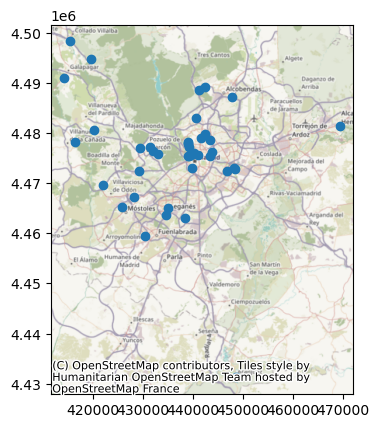

In [101]:
gdf_universidadesAgregadasManualmente = pd.read_csv('universidadesAgregadasManualmente.csv', delimiter=',', encoding='UTF-8')
gdf_universidadesAgregadasManualmente['geometry'] = gdf_universidadesAgregadasManualmente[['direccion_coor_x', 'direccion_coor_y']].apply(lambda x: Point(x['direccion_coor_x'], x['direccion_coor_y']), axis=1)
gdf_universidadesAgregadasManualmente = gdf_universidadesAgregadasManualmente.set_geometry('geometry')
gdf_universidadesAgregadasManualmente = gdf_universidadesAgregadasManualmente.set_crs('EPSG:4326')
gdf_universidadesAgregadasManualmente = gdf_universidadesAgregadasManualmente.to_crs('EPSG:32630')

ax = gdf_universidadesAgregadasManualmente.plot()
cx.add_basemap(crs= gdf_universidadesAgregadasManualmente.crs, ax=ax)

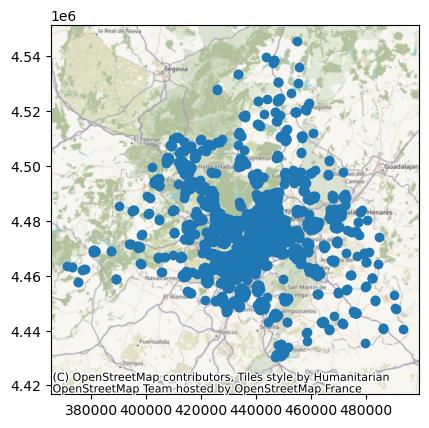

In [103]:
gdf_centrosEducativos = df_centrosEducativos.copy()
gdf_centrosEducativos['geometry'] = gdf_centrosEducativos[['direccion_coor_x', 'direccion_coor_y']].apply(lambda x: Point(x['direccion_coor_x'], x['direccion_coor_y']), axis=1)
gdf_centrosEducativos = gdf_centrosEducativos.set_geometry('geometry')
gdf_centrosEducativos = gdf_centrosEducativos.set_crs('EPSG:32630')
gdf_centrosEducativos = gdf_centrosEducativos.dropna(subset='direccion_coor_x')

gdf_centrosEducativos = pd.concat([gdf_centrosEducativos, gdf_universidadesAgregadasManualmente])

gdf_centrosEducativos.to_file('./cleaned/centrosEducativos.geojson')

ax = gdf_centrosEducativos.plot()
cx.add_basemap(crs=gdf_centrosEducativos.crs, ax= ax)